In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
os.chdir(r"D:\Downloads\Saurabh\LinearReg")

In [3]:
os.listdir()

['Car_sales.csv', 'Loans.csv']

In [4]:
mydf=pd.read_csv("Car_sales.csv")

In [5]:
mydf.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [6]:
mydf.shape

(157, 16)

## Exploratory Data Analysis 

In [7]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [8]:
list(mydf.dtypes[mydf.dtypes=="object"].index)

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

In [9]:
list(mydf.dtypes[mydf.dtypes!="object"].index)

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

#### Univariate Analysis 

In [10]:
mydf["Manufacturer"].value_counts(dropna=False)

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [11]:
mydf["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [12]:
mydf["Manufacturer"].nunique()

30

In [13]:
ij=mydf["Manufacturer"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=mydf["Manufacturer"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Manufacturer", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Manufacturer,Cnt,perc
0,Dodge,11,7.006369
1,Ford,11,7.006369
2,Toyota,9,5.732484
3,Chevrolet,9,5.732484
4,Mercedes-B,9,5.732484
5,Mitsubishi,7,4.458599
6,Nissan,7,4.458599
7,Chrysler,7,4.458599
8,Volvo,6,3.821656
9,Oldsmobile,6,3.821656


In [14]:
ij=mydf["Model"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)
ik=mydf["Model"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Model", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Model,Cnt,perc
0,Neon,2,1.273885
1,Integra,1,0.636943
2,Cutlass,1,0.636943
3,Sentra,1,0.636943
4,Altima,1,0.636943
...,...,...,...
151,Windstar,1,0.636943
152,Expedition,1,0.636943
153,Ranger,1,0.636943
154,F-Series,1,0.636943


In [15]:
mydf.drop(columns=["Model"], inplace=True)

In [16]:
mydf["Vehicle_type"]

0      Passenger
1      Passenger
2      Passenger
3      Passenger
4      Passenger
         ...    
152    Passenger
153    Passenger
154    Passenger
155    Passenger
156    Passenger
Name: Vehicle_type, Length: 157, dtype: object

In [17]:

ij=mydf["Vehicle_type"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)
ik=mydf["Vehicle_type"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Vehicle_type", "Cnt", "perc"]

my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Vehicle_type,Cnt,perc
0,Passenger,116,73.88535
1,Car,41,26.11465


In [18]:
# mydf["Latest_Launch"] 

In [19]:
mydf.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000


In [20]:
# plt.hist(mydf["Wheelbase"])

In [21]:
mydf[mydf["Sales_in_thousands"]>=244.025440] 

,Manufacturer,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
49,Ford,245.815,10.055,Passenger,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,12/20/2011,62.503740
52,Ford,276.747,16.640,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496
56,Ford,540.561,15.075,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,8/16/2012,89.401935
137,Toyota,247.994,13.245,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,02-10-2011,54.372420


In [22]:
mydf[mydf["Sales_in_thousands"]<=2]

,Manufacturer,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
6,Audi,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
39,Dodge,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,08-07-2011,188.144323
83,Mitsubishi,0.110,20.940,Passenger,25.450,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,6/29/2012,67.544155
97,Mercedes-B,1.526,NaN,Passenger,41.000,2.3,185.0,94.5,67.5,157.3,2.975,14.0,27.0,08-06-2011,81.848969
99,Mercedes-B,0.954,NaN,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,04-11-2011,141.100985
108,Oldsmobile,1.112,11.240,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,5/31/2011,60.861612
117,Plymouth,1.872,NaN,Passenger,43.000,3.5,253.0,113.3,76.3,165.4,2.850,12.0,21.0,6/27/2012,106.984456
125,Porsche,1.280,60.625,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
126,Porsche,1.866,67.550,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,07-11-2011,135.914710


C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


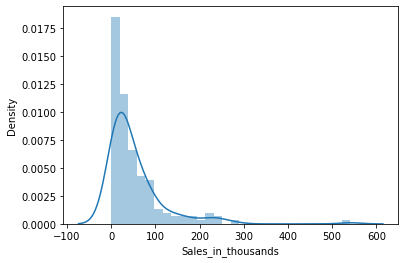

In [23]:
sns.distplot(mydf["Sales_in_thousands"])
plt.show()

## Bi-Variate analysis 

In [24]:
# Cat-Cat
# Cat-num
# Num-Num

In [25]:
# Chi Square Test
# Manufacturer Vs Vehicle_type

# Null Hypo (Ho) : Manufacture and Vehicle_type are independent
# Alter Hypo(Ha) : Manufacture and Vehicle_type  are associated
# CI - 95% 
Alpha=.05
# Decision Rule :
#     if p value >= Alpha , Accept Null hypo
#     If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis


In [26]:
ct=pd.crosstab(mydf["Manufacturer"], mydf["Vehicle_type"])
stats.chi2_contingency(ct) 

(46.5269935477568,
 0.0207837936749347,
 29,
 array([[1.04458599, 2.95541401],
        [0.78343949, 2.21656051],
        [0.78343949, 2.21656051],
        [1.04458599, 2.95541401],
        [1.30573248, 3.69426752],
        [2.35031847, 6.64968153],
        [1.82802548, 5.17197452],
        [2.87261146, 8.12738854],
        [2.87261146, 8.12738854],
        [1.30573248, 3.69426752],
        [0.78343949, 2.21656051],
        [0.2611465 , 0.7388535 ],
        [0.2611465 , 0.7388535 ],
        [0.78343949, 2.21656051],
        [1.56687898, 4.43312102],
        [0.78343949, 2.21656051],
        [2.35031847, 6.64968153],
        [1.56687898, 4.43312102],
        [1.82802548, 5.17197452],
        [1.82802548, 5.17197452],
        [1.56687898, 4.43312102],
        [1.04458599, 2.95541401],
        [1.56687898, 4.43312102],
        [0.78343949, 2.21656051],
        [0.52229299, 1.47770701],
        [1.30573248, 3.69426752],
        [0.52229299, 1.47770701],
        [2.35031847, 6.64968153],
   

In [27]:
mydf.groupby(["Manufacturer", "Vehicle_type"]).agg({"Sales_in_thousands":["count"]})

Sales_in_thousands
                                       count
Manufacturer Vehicle_type                   
Acura        Passenger                     4
Audi         Passenger                     3
BMW          Passenger                     3
Buick        Passenger                     4
Cadillac     Car                           1
             Passenger                     4
Chevrolet    Passenger                     9
Chrysler     Car                           1
             Passenger                     6
Dodge        Car                           6
             Passenger                     5
Ford         Car                           5
             Passenger                     6
Honda        Car                           3
             Passenger                     2
Hyundai      Passenger                     3
Infiniti     Passenger                     1
Jaguar       Passenger                     1
Jeep         Car                           3
Lexus        Car                           2
             Passenger                     4
Lincoln      Car                           1
             Passenger                     2
Mercedes-B   Car                           1
             Passenger                     8
Mercury      Car                           2
             Passenger                     4
Mitsubishi   Car                           2
             Passenger                     5
Nissan       Car                           4
             Passenger                     3
Oldsmobile   Car                           2
             Passenger                     4
Plymouth     Car                           1
             Passenger                     3
Pontiac      Car                           1
             Passenger                     5
Porsche      Passenger                     3
Saab         Passenger                     2
Saturn       Passenger                     5
Subaru       Car                           1
             Passenger                     1
Toyota       Car                           5
             Passenger                     4
Volkswagen   Passenger                     6
Volvo        Passenger                     6

In [28]:
# cat-Vehicle
# num-Sales
# Null Hyp(ho) : avg(car)=avg(passenger)  - No effect 
# alt Hyp(ha) : avg(car) <> avg(passenger) - Effect

# CI =99%

# Alpha=.01
# # Decision Rule :
# #     if p value >= Alpha , Accept Null hypo
# #     If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis
  

car=mydf[mydf["Vehicle_type"]=="Car"]
passenger=mydf[mydf["Vehicle_type"]!="Car"]

In [29]:
stats.ttest_ind(car["Sales_in_thousands"], passenger["Sales_in_thousands"])

Ttest_indResult(statistic=3.1076673920909745, pvalue=0.0022437086557697637)

In [30]:
car["Sales_in_thousands"].mean(), passenger["Sales_in_thousands"].mean()

(80.62229268292684, 43.234344827586206)

<AxesSubplot:xlabel='Vehicle_type'>

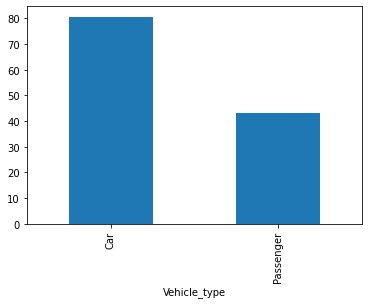

In [35]:
mydf.groupby(["Vehicle_type"])["Sales_in_thousands"].mean().plot(kind="bar")

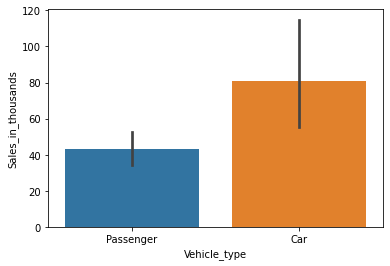

In [38]:
sns.barplot(x="Vehicle_type", y="Sales_in_thousands", data=mydf)
plt.show()

#### Num- Num

In [39]:
# Target ~ X
# X~X

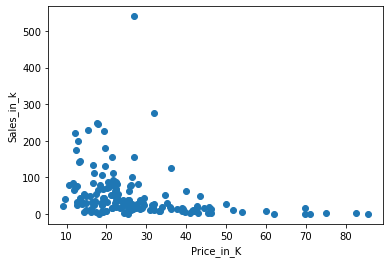

In [40]:
plt.scatter(mydf["Price_in_thousands"], mydf["Sales_in_thousands"])
plt.xlabel("Price_in_K")
plt.ylabel("Sales_in_k")
plt.show()

In [41]:
mydf[["Price_in_thousands", "Sales_in_thousands"]].corr()

,Price_in_thousands,Sales_in_thousands
Price_in_thousands,1.000000,-0.304734
Sales_in_thousands,-0.304734,1.000000


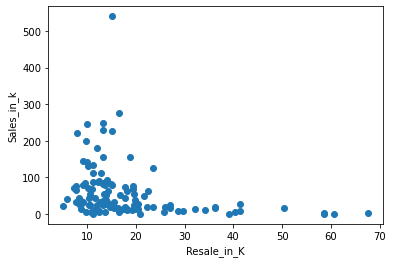

In [43]:
plt.scatter(mydf["four_year_resale_value"], mydf["Sales_in_thousands"])
plt.xlabel("Resale_in_K")
plt.ylabel("Sales_in_k")
plt.show()

In [44]:
mydf[["four_year_resale_value", "Sales_in_thousands"]].corr() 

,four_year_resale_value,Sales_in_thousands
four_year_resale_value,1.000000,-0.279034
Sales_in_thousands,-0.279034,1.000000


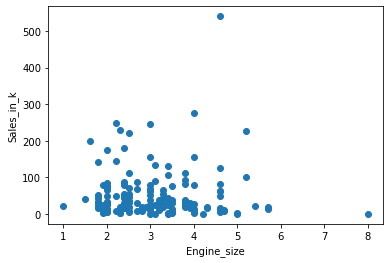

In [45]:
plt.scatter(mydf["Engine_size"], mydf["Sales_in_thousands"])
plt.xlabel("Engine_size")
plt.ylabel("Sales_in_k")
plt.show()

In [46]:
mydf[["Engine_size", "Sales_in_thousands"]].corr() 

,Engine_size,Sales_in_thousands
Engine_size,1.000000,0.019983
Sales_in_thousands,0.019983,1.000000


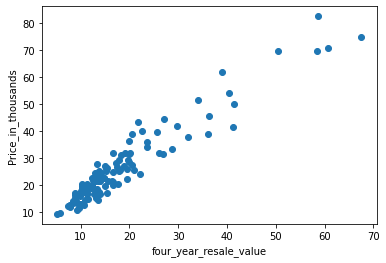

In [47]:
plt.scatter(mydf["four_year_resale_value"], mydf["Price_in_thousands"])
plt.xlabel("four_year_resale_value")
plt.ylabel("Price_in_thousands")
plt.show()

In [48]:
mydf[["four_year_resale_value", "Price_in_thousands"]].corr() 

,four_year_resale_value,Price_in_thousands
four_year_resale_value,1.00000,0.95384
Price_in_thousands,0.95384,1.00000


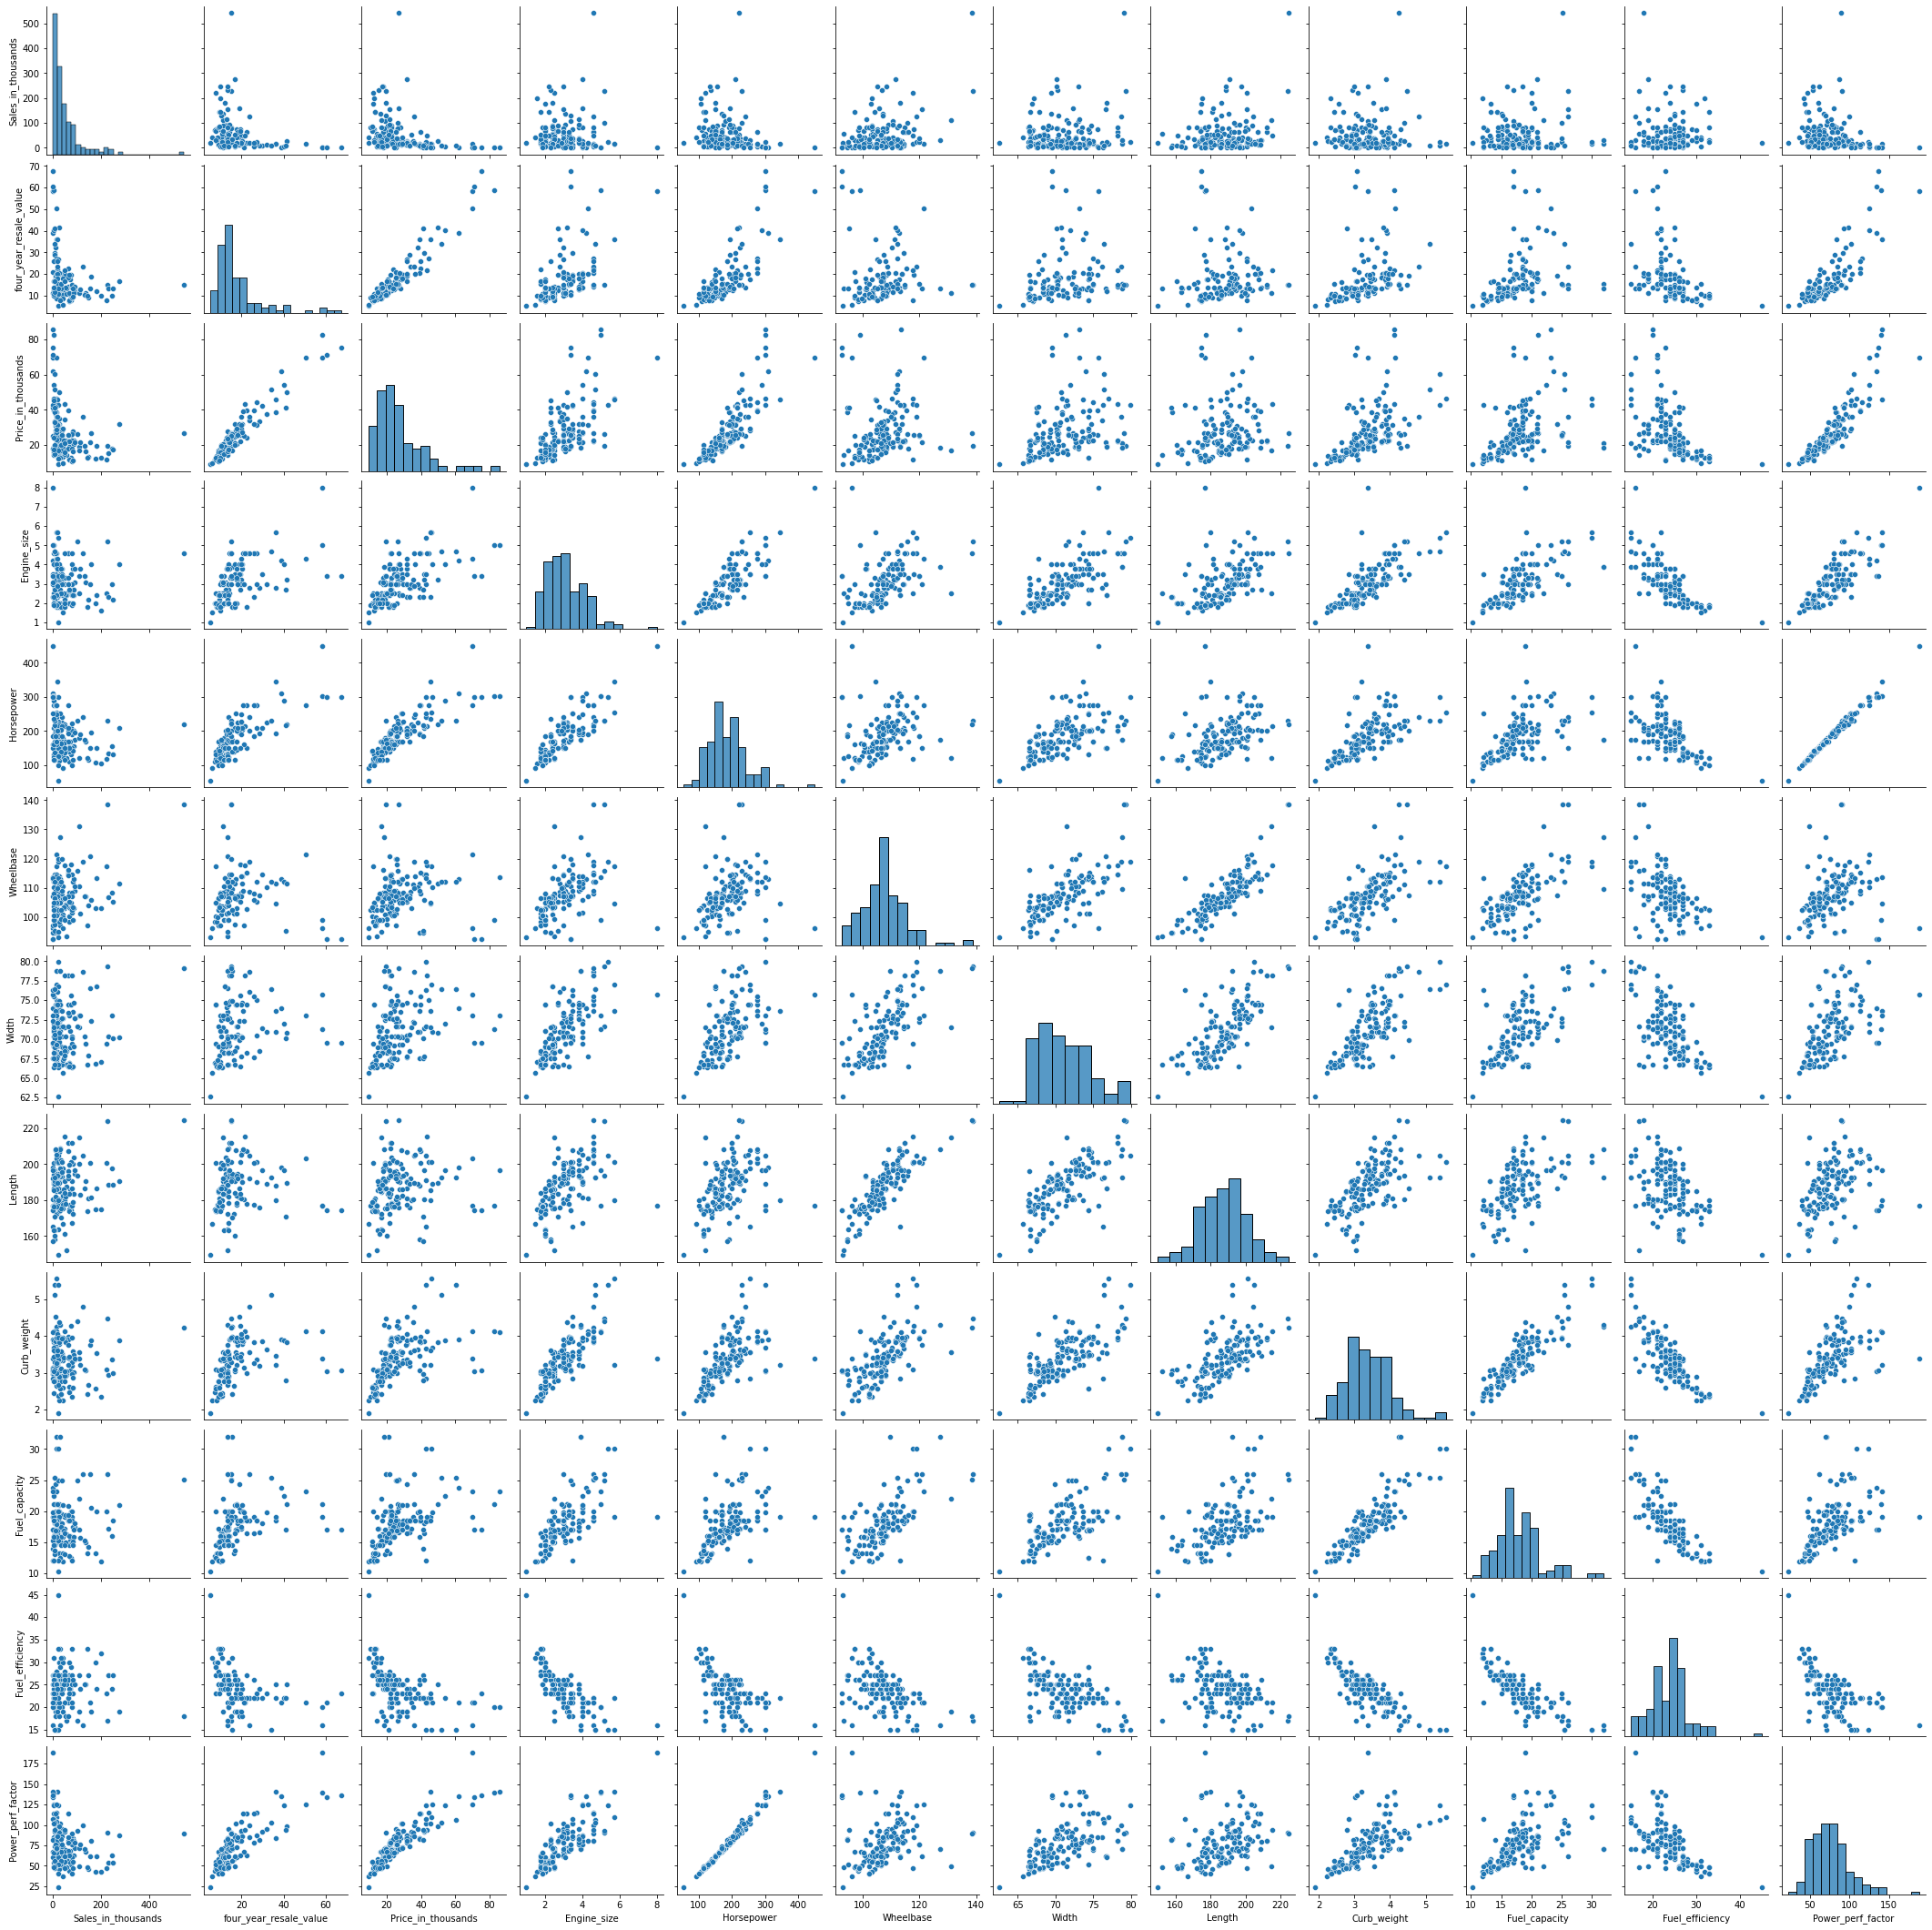

In [49]:
sns.pairplot(mydf)
plt.show()

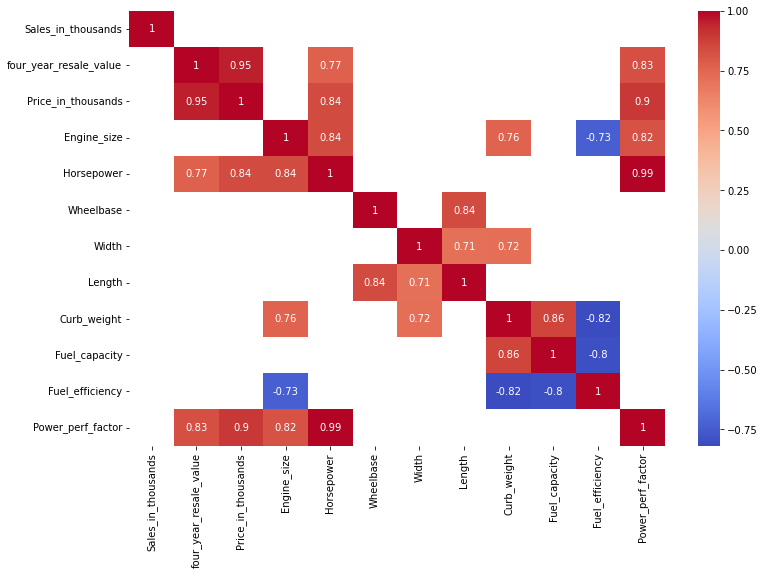

In [64]:
plt.figure(figsize=(12,8))
cr=mydf.corr()
cr1=cr[(cr>.7) |(cr<-.7)]
sns.heatmap(cr1,cmap="coolwarm" , annot=True)
plt.show()

In [66]:
cr.to_excel("Corr.xlsx")

In [67]:
os.getcwd()

'D:\\Training\\Imarticus\\PGA\\PGA23\\ML\\LinearReg'

### Treatments : Outliers 

In [69]:
out=mydf.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

In [70]:
out.to_excel("Outliers.xlsx")

In [80]:
mydf["Sales_in_thousands"]=np.where(mydf["Sales_in_thousands"]>=260.6,260.6, mydf["Sales_in_thousands"])
mydf["Engine_size"]=np.where(mydf["Engine_size"]>=5.7,5.7, mydf["Engine_size"])
mydf["Horsepower"]=np.where(mydf["Horsepower"]>=325.8,325.8, mydf["Horsepower"])
mydf["Fuel_efficiency"]=np.where(mydf["Fuel_efficiency"]>=33,33, mydf["Fuel_efficiency"])
mydf["Power_perf_factor"]=np.where(mydf["Power_perf_factor"]>=141.1,141.1, mydf["Power_perf_factor"])


In [81]:
mydf["Sales_in_thousands"].max() 

260.6

In [82]:
mydf.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,51.112038,57.725356,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,253.54064,260.600
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,60.22000,67.550
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.47980,85.500
Engine_size,156.0,3.046154,0.989257,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.70000,5.700
Horsepower,156.0,185.029487,53.417295,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,317.11000,325.800
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.37500,138.700
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.19000,79.900
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.30500,224.500
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.39668,5.572
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.90000,32.000


## Treatments : Missing 

In [102]:
def myMissing(data): 
    gj=pd.DataFrame(data.isnull().sum()).reset_index()
    gj.columns=["Variable", "Missing_Count"]
    gh=pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2)).reset_index()
    gh.columns=["Variable", "MissingValue"]
    dfg=pd.merge(gj, gh, on=["Variable"], how="inner")
    final=dfg.sort_values(by=["Missing_Count"],ascending=False)
    return final

In [110]:
myMissing(mydf)

,Variable,Missing_Count,MissingValue
2,four_year_resale_value,36,22.93
12,Fuel_efficiency,3,1.91
4,Price_in_thousands,2,1.27
10,Curb_weight,2,1.27
14,Power_perf_factor,2,1.27
5,Engine_size,1,0.64
6,Horsepower,1,0.64
7,Wheelbase,1,0.64
8,Width,1,0.64
9,Length,1,0.64


In [104]:
c1=mydf.dropna()
c1.shape

(117, 15)

In [106]:
c1=mydf.fillna(method="ffill")
print(c1.shape)


(157, 15)


In [107]:
myMissing(c1)

,Variable,Missing_Count,MissingValue
0,Manufacturer,0,0.0
1,Sales_in_thousands,0,0.0
2,four_year_resale_value,0,0.0
3,Vehicle_type,0,0.0
4,Price_in_thousands,0,0.0
5,Engine_size,0,0.0
6,Horsepower,0,0.0
7,Wheelbase,0,0.0
8,Width,0,0.0
9,Length,0,0.0


In [109]:
c1=mydf.fillna(mydf.median())
print(c1.shape)

(157, 15)


C:\Users\Archit\AppData\Local\Temp/ipykernel_2672/2683998128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  c1=mydf.fillna(mydf.median())


In [111]:
myMissing(c1)

,Variable,Missing_Count,MissingValue
0,Manufacturer,0,0.0
1,Sales_in_thousands,0,0.0
2,four_year_resale_value,0,0.0
3,Vehicle_type,0,0.0
4,Price_in_thousands,0,0.0
5,Engine_size,0,0.0
6,Horsepower,0,0.0
7,Wheelbase,0,0.0
8,Width,0,0.0
9,Length,0,0.0


In [112]:
c1.drop(columns=["Latest_Launch"], inplace=True)

### Dummy Creation 

In [141]:
c2=pd.get_dummies(data=c1,columns=["Manufacturer", "Vehicle_type"] , drop_first=True)a

In [142]:
c1.shape

(157, 14)

In [143]:
c2.shape

(157, 42)

In [144]:
c1.head()

,Manufacturer,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917
3,Acura,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [145]:
c2.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


In [148]:
c2.dtypes

Sales_in_thousands         float64
four_year_resale_value     float64
Price_in_thousands         float64
Engine_size                float64
Horsepower                 float64
Wheelbase                  float64
Width                      float64
Length                     float64
Curb_weight                float64
Fuel_capacity              float64
Fuel_efficiency            float64
Power_perf_factor          float64
Manufacturer_Audi            uint8
Manufacturer_BMW             uint8
Manufacturer_Buick           uint8
Manufacturer_Cadillac        uint8
Manufacturer_Chevrolet       uint8
Manufacturer_Chrysler        uint8
Manufacturer_Dodge           uint8
Manufacturer_Ford            uint8
Manufacturer_Honda           uint8
Manufacturer_Hyundai         uint8
Manufacturer_Infiniti        uint8
Manufacturer_Jaguar          uint8
Manufacturer_Jeep            uint8
Manufacturer_Lexus           uint8
Manufacturer_Lincoln         uint8
Manufacturer_Mercedes-B      uint8
Manufacturer_Mercury

## Model Development Phase

#### Assumptions Check

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


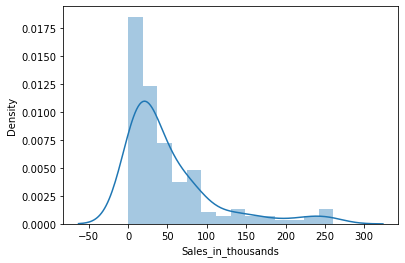

In [149]:
sns.distplot(c2["Sales_in_thousands"])
plt.show()

In [ ]:
# Shapiro Normality Test (Small)
# # Jarque bera  normality test  ( Large )
# Null Hyp (): Data is noraml
# Alternative : Data is not normal
# Test : Shapiro
# Alpha - 0.05
# Decision :
#     If p is >Alpha , Null is accepted 
#     If p is < Alpha , Null is rejected , Data is  not normal

In [150]:
from scipy import stats
stats.shapiro(c2["Sales_in_thousands"])

ShapiroResult(statistic=0.7552433609962463, pvalue=6.816103349192035e-15)

In [151]:
stats.jarque_bera(c2["Sales_in_thousands"])

Jarque_beraResult(statistic=188.20847561181662, pvalue=0.0)

In [152]:
c3=c2.copy()

In [162]:
c3["Sales_in_K_sqr"]=np.log1p(c3["Sales_in_thousands"])

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


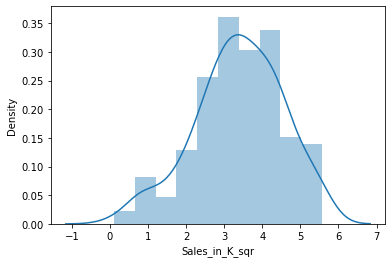

In [163]:
sns.distplot(c3["Sales_in_K_sqr"])
plt.show()

In [164]:
stats.shapiro(c3["Sales_in_K_sqr"])

ShapiroResult(statistic=0.9831035733222961, pvalue=0.05206900089979172)

In [174]:
# sqr , sqrt, cube, cuberoot, log(log10, log2, loge, log1p) , antilog
transformed_value, lmbda=stats.boxcox(c3["Sales_in_thousands"])


In [175]:
lmbda

0.19511845998877894

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

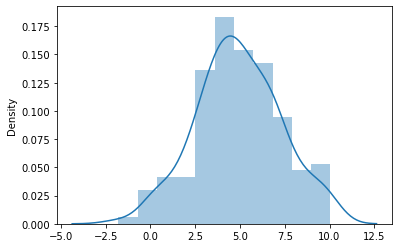

In [176]:
sns.distplot(transformed_value)

In [177]:
stats.shapiro(transformed_value)

ShapiroResult(statistic=0.9921770691871643, pvalue=0.5496459603309631)

In [179]:
transformed_value.std()

2.352515022653551

In [178]:
c3["Sales_in_thousands"].std()

57.72535622702549

In [180]:
c2["Sales_transformed"]=transformed_value

#### AutoCorrelation : 
    Durbin Watson Test 

In [181]:
# Null Hyp(Ho) : There is no Autocorrelation 


In [182]:
# Model Development - statistical way , Sklearn , ML- ( Optimizers SDG, GD- Cost Function etc..)

In [183]:
y=c2["Sales_transformed"]
x=c2.drop(columns=["Sales_transformed", "Sales_in_thousands"])

In [184]:
import statsmodels.api as sm

C:\Users\Archit\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [196]:
x1=sm.add_constant(x)
reg=sm.OLS(y, x1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      Sales_transformed   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     6.376
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           2.05e-15
Time:                        15:05:31   Log-Likelihood:                -264.01
No. Observations:                 157   AIC:                             612.0
Df Residuals:                     115   BIC:                             740.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [197]:
# Linear Regression Hypothesis:
# Null Hypo(ho) : Y does not depend on X varaibles ( All m values from x are zeros)
# Alter Hypo(ha): Y does depend on atleast one X variable ( There is atleast one feature , 
#                                                          which does have non zero m value)

#     if p <0.05 : Null will be rejected 
#     if p >=.05 : Null Acepted ,  

In [ ]:
R-squared:                       0.694
Adj. R-squared:                  0.586

In [244]:
y=c2["Sales_transformed"]
x=c2.drop(columns=["Sales_transformed", "Sales_in_thousands", "Length",
                   "Width", "Manufacturer_BMW", "Manufacturer_Audi","Manufacturer_Volvo",
                   "Manufacturer_Chrysler","Manufacturer_Infiniti","Manufacturer_Jaguar",
                   "Manufacturer_Mercury","Manufacturer_Mitsubishi","Manufacturer_Cadillac",
                   "Manufacturer_Volkswagen","Manufacturer_Saab","Manufacturer_Mercedes-B",
                   "Manufacturer_Lexus","Manufacturer_Lincoln","Manufacturer_Subaru",
                   "Manufacturer_Hyundai","Manufacturer_Buick","Manufacturer_Oldsmobile",
                   "Manufacturer_Pontiac","Manufacturer_Chevrolet","Manufacturer_Saturn",
                  "four_year_resale_value","Horsepower","Power_perf_factor",
                  "Fuel_capacity", "Curb_weight", "Manufacturer_Dodge", "Manufacturer_Porsche"])
x2=sm.add_constant(x)
reg2=sm.OLS(y, x2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:      Sales_transformed   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     20.79
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           9.38e-25
Time:                        15:46:52   Log-Likelihood:                -282.76
No. Observations:                 157   AIC:                             589.5
Df Residuals:                     145   BIC:                             626.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11